In [104]:
%matplotlib inline
import numpy as np
import astropy.io.fits as pf
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy.ndimage as ndi
from PIL import Image
import pdb
import math

mpl.rcParams['xtick.labelsize'] = 14
mpl.rcParams['ytick.labelsize'] = 14
mpl.rcParams['font.size'] = 15
mpl.rcParams['figure.figsize'] = (8,6)


#Dark Current
sumdark1 = np.zeros((1336, 2004))
for i in np.arange(16, 23):
	dark1 = pf.getdata("./10-11-2017/00" + str(i) + ".fts")
	sumdark1 = sumdark1 + dark1
avgdark1 = sumdark1/8

sumdark2 = np.zeros((1336, 2004))
for i in np.arange(136, 143):
	dark2 = pf.getdata("./10-18-2017/0" + str(i) + ".fts")
	sumdark2 = sumdark2 + dark2
avgdark2 = sumdark2/8
    
sumdark3 = np.zeros((1336, 2004))
for i in np.arange(17, 24):
	dark3 = pf.getdata("./10-26-2017/00" + str(i) + ".fts")
	sumdark3 = sumdark3 + dark3
avgdark3 = sumdark3/8

file1 = '10-11-2017/0013.fts'
file2 = '10-18-2017/0128.fts'
file3 = '10-26-2017/0008.fts'

header1 = pf.getheader(file1)#Get the header from the fits file
header2 = pf.getheader(file2)
header3 = pf.getheader(file3)

ccd_data1 = pf.getdata(file1) #Get the CCD data from the fits file
ccd_data2 = pf.getdata(file2)
ccd_data3 = pf.getdata(file3)

for key in header1:
    print(key + ": ", header1[key])
for key in header2:
    print(key + ": ", header2[key])
for key in header3:
    print(key + ": ", header3[key])

SIMPLE:  True
BITPIX:  16
NAXIS:  2
NAXIS1:  2004
NAXIS2:  1336
BZERO:  32768
BSCALE:  1
OFFSET1:  0
OFFSET2:  0
XFACTOR:  2
YFACTOR:  2
EXPTIME:  8
ORIGIN:  Leuschner Observatory
TELESCOP:  Leuschner 30 SBIG
CDELT1:  -0.0001666666667
CDELT2:  0.0001666666667
INSTRUME:  SBIG ST-L-11K 3 CCD Camera
JD:  2458038.676684318
DATE-OBS:  2017-10-12
TIME-OBS:  04:14:25.52
LST:  21:28:22
POSANGLE:    14:41:33
LATITUDE:   37:55:06
LONGITUD:  -122:26:49
ELEVATIO:   59:58:02
AZIMUTH:  198:33:01
HA:    0:37:06.99
RAEOD:   20:51:14.93
DECEOD:    9:04:25.8
RA:   20:50:23.22
DEC:    9:00:12.0
OBJRA:   20:50:55.0
OBJDEC:    9:01:33.9
EPOCH:  2000
EQUINOX:  2000
FILTER:  
CAMTEMP:  -14
RAWHENC:  -1.4171736
RAWDENC:  0.84469812
RAWOSTP:  162.19477
FOCUSPOS:  25814.1
RAWISTP:  0
COMMENT:  Weather at UT Thu Oct 12 04:12:44 2017
Weather at UT Thu Oct 12 04:13:03 2017
Weather at UT Thu Oct 12 04:13:25 2017
Weather at UT Thu Oct 12 04:13:44 2017
Weather at UT Thu Oct 12 04:14:04 2017
Weather at UT Thu Oct 12 0

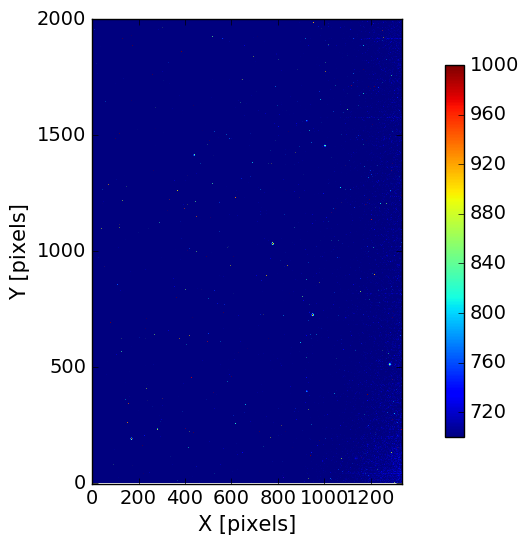

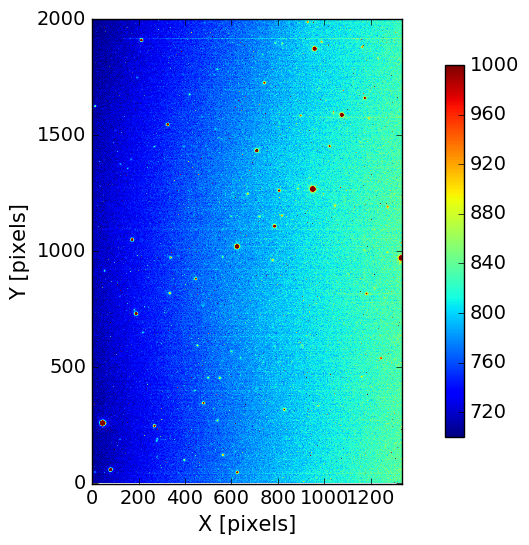

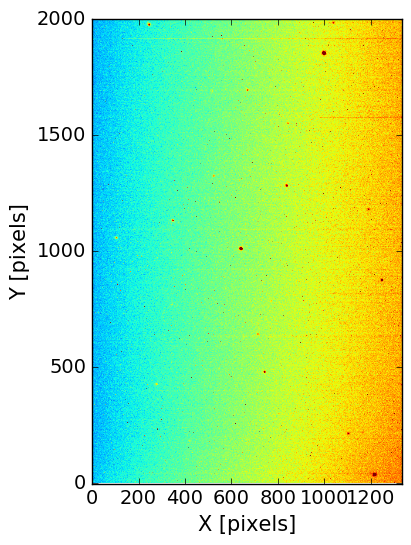

In [87]:

plt.figure()

img1 = plt.imshow(np.flipud(np.rot90(ccd_data1)), vmin = 700, vmax=1000)
clb = plt.colorbar(img1, fraction = 0.03, pad = 0.07)


ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

plt.imshow(np.flipud(np.rot90(ccd_data2)), vmin = 600, vmax=900)
clb = plt.colorbar(img1, fraction = 0.03, pad = 0.07)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

plt.imshow(np.flipud(np.rot90(ccd_data3)), vmin = 500, vmax=800)
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

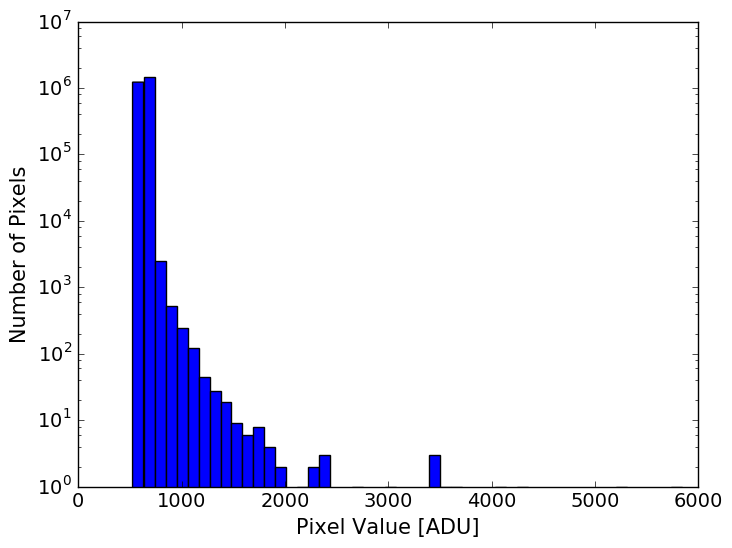

In [73]:
ccd_data_1D = ccd_data1.flatten()

#plt.figure()

plt.hist(ccd_data_1D, bins=50)

plt.xlabel('Pixel Value [ADU]')
plt.ylabel('Number of Pixels')

plt.yscale("log", nonposy='clip')

#plt.show()

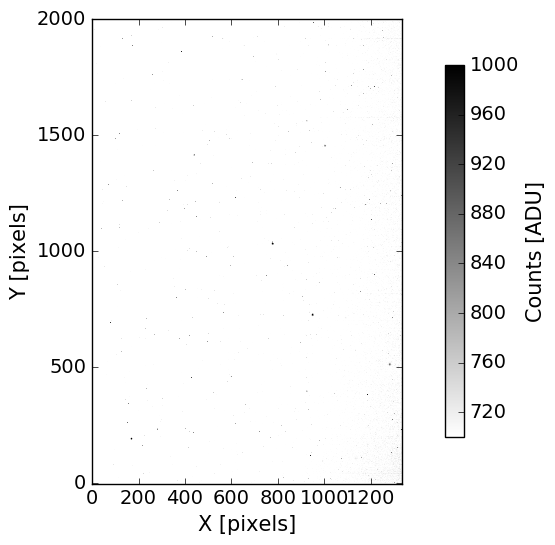

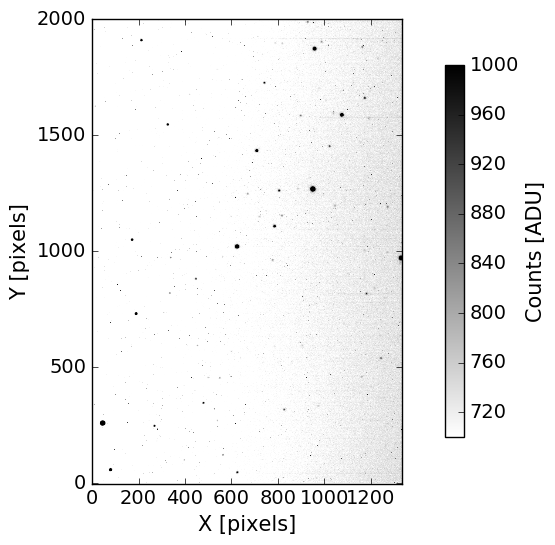

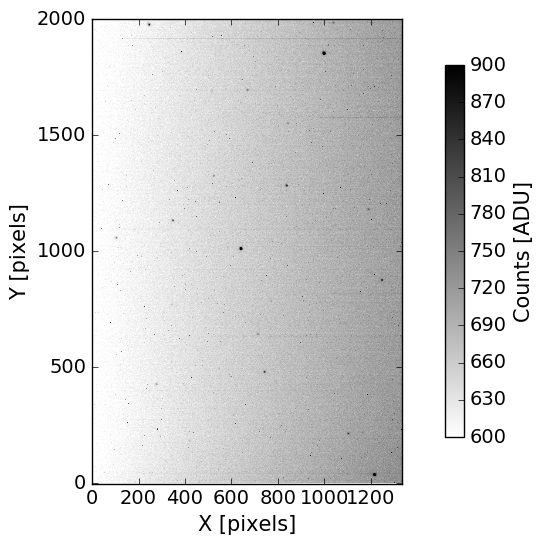

In [77]:
plt.figure()

img = plt.imshow(np.flipud(np.rot90(ccd_data1)), vmin=700, vmax=1000, cmap='gray_r')

clb = plt.colorbar(img, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')

ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

plt.figure()

img = plt.imshow(np.flipud(np.rot90(ccd_data2)), vmin=700, vmax=1000, cmap='gray_r')

clb = plt.colorbar(img, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')

ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

plt.figure()

img = plt.imshow(np.flipud(np.rot90(ccd_data3)), vmin=600, vmax=900, cmap='gray_r')

clb = plt.colorbar(img, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')

ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

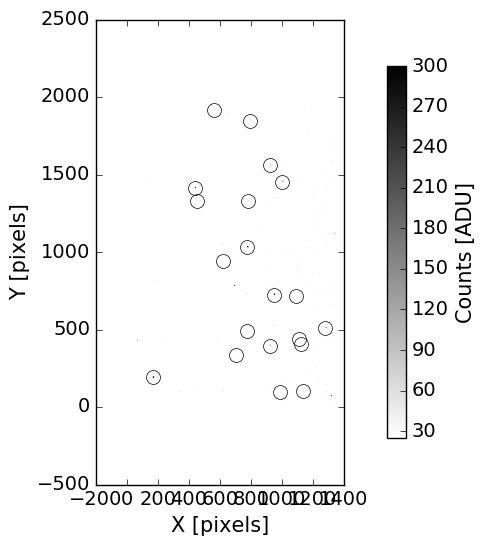

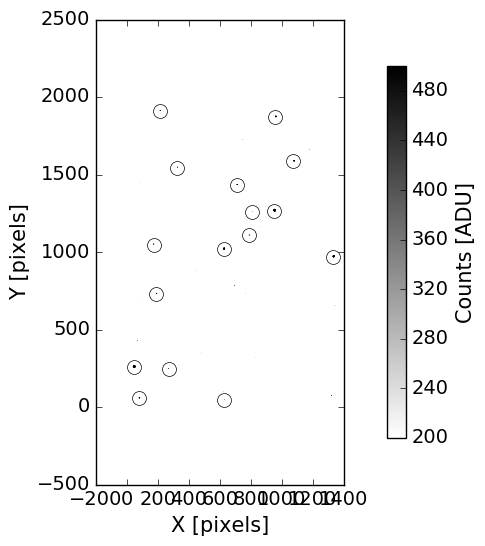

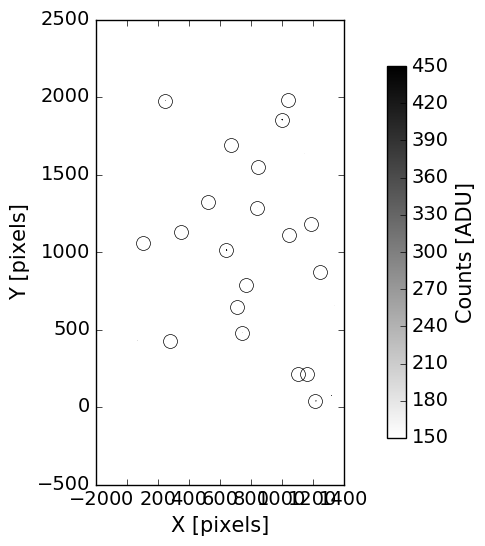

In [83]:
def getstars(image, max_stars, star_radius, gaussian_sigma):
    #
    # James R. Graham 11/7/2011 University of Toronto
    #
    # image - image
    # max_stars - number of stars to find
    # star_radius - radius of exclusion zone
    # gaussian_sigma - sigma in the Gaussian smoothing function 
    #
    # Step 1) Find the stars in an image starting with the brightest peak.
    # Step 2) Remove that star and the search for the next brightest peak.

    filtered_image = ndi.filters.gaussian_filter(image, gaussian_sigma) # filter the image
    
    starxy = np.zeros([max_stars,2])

    x = np.arange(np.float(image.shape[1]))  # row/column order
    y = np.arange(np.float(image.shape[0]))
    xx, yy = np.meshgrid(x, y)

    for star in np.arange(max_stars):
        coordinate = np.unravel_index(np.argmax(filtered_image), image.shape)  # only pick out one value

        starxy[star,0] = coordinate[1]   # x - row/column order
        starxy[star,1] = coordinate[0]   # y 

        r2 = (xx-coordinate[1])**2. + (yy-coordinate[0])**2.
       
        filtered_image[np.where(r2 <= star_radius**2.)] = -999.0 # zero out that part of the array 

    return starxy, filtered_image
#############################################################################################################
dark_subtracted_ccd_data1 = ccd_data1 - avgdark1
image1 = dark_subtracted_ccd_data1 - np.median(dark_subtracted_ccd_data1)

star_radius = 18. # radius of region to blank out when removing star from image
gaussian_sigma = 4. # smoothing rms to use when search for stars
max_stars = 20 # maximum number of stars to locate

# find the brightest stars and return smoothed image

starxy1, filtered_image1 = getstars(image1, max_stars, star_radius, gaussian_sigma)

plt.figure()

img1 = plt.imshow(np.transpose(image1), vmin=25, vmax=300, cmap="gray_r") #Set colormap

plt.plot(starxy1[:,1], starxy1[:,0],'ro', markerfacecolor='none', markersize=10)

clb = plt.colorbar(img1, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')
#invert y-axis
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

#############################################################################################################
dark_subtracted_ccd_data2 = ccd_data2 - avgdark2
image2 = dark_subtracted_ccd_data2 - np.median(dark_subtracted_ccd_data2)

star_radius = 18. # radius of region to blank out when removing star from image
gaussian_sigma = 4. # smoothing rms to use when search for stars
max_stars = 16 # maximum number of stars to locate

# find the brightest stars and return smoothed image

starxy2, filtered_image2 = getstars(image2, max_stars, star_radius, gaussian_sigma)

plt.figure()

img2 = plt.imshow(np.transpose(image2), vmin=200, vmax=500, cmap="gray_r") #Set colormap

plt.plot(starxy2[:,1], starxy2[:,0],'ro', markerfacecolor='none', markersize=10)

clb = plt.colorbar(img2, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')
#invert y-axis
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()
###############################################################################################################
dark_subtracted_ccd_data3 = ccd_data3 - avgdark3
image3 = dark_subtracted_ccd_data3 - np.median(dark_subtracted_ccd_data3)

star_radius = 18. # radius of region to blank out when removing star from image
gaussian_sigma = 4. # smoothing rms to use when search for stars
max_stars = 20 # maximum number of stars to locate

# find the brightest stars and return smoothed image

starxy3, filtered_image3 = getstars(image3, max_stars, star_radius, gaussian_sigma)

plt.figure()

img3 = plt.imshow(np.transpose(image3), vmin=150, vmax=450, cmap="gray_r") #Set colormap

plt.plot(starxy3[:,1], starxy3[:,0],'ro', markerfacecolor='none', markersize=10)

clb = plt.colorbar(img3, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')
#invert y-axis
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

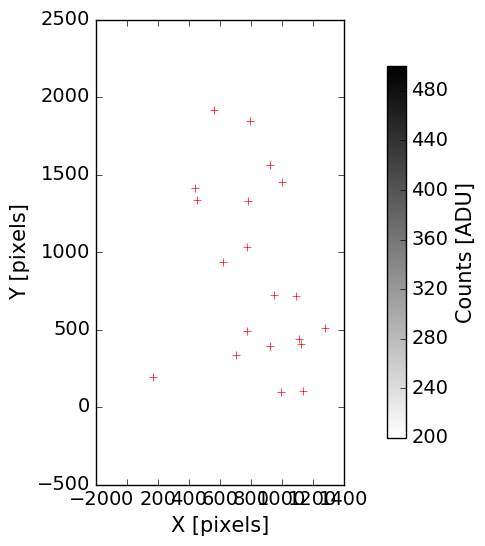

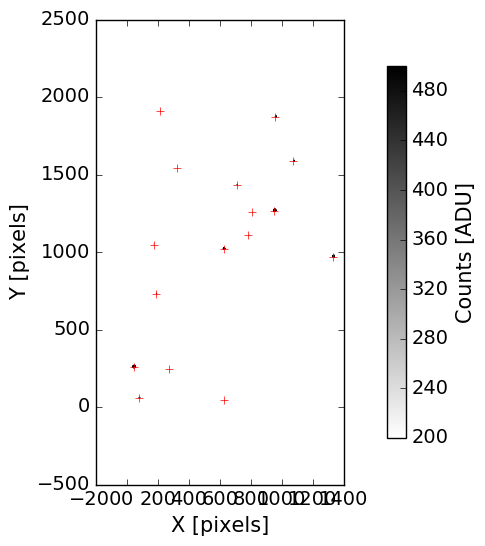

C:\Users\verde\Anaconda3\lib\site-packages\ipykernel\__main__.py:46: RuntimeWarning: invalid value encountered in sqrt


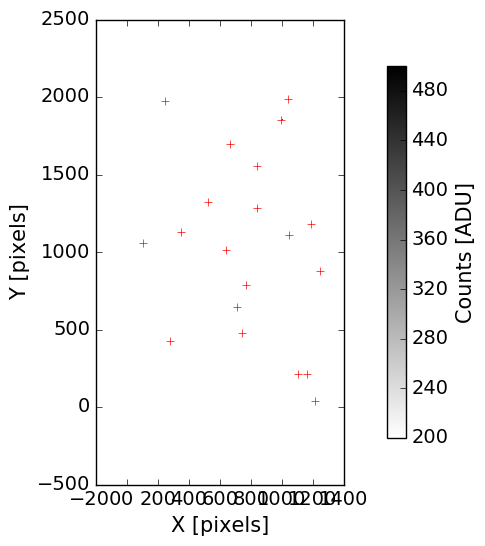

In [91]:
def star_centroids(image, starxy, star_radius, annulus_width):
    
    # James R. Graham 11/7/2011 University of Toronto
    #
    # Measure star centroids
    #
    # starrad  radius of sky aperture 
    # nsky     number of pixels insky annulus relative to star 

    x = np.arange(0, image.shape[1])  # row/column order
    y = np.arange(0, image.shape[0])

    sky_radius = np.sqrt(annulus_width+1)*star_radius

    xx, yy = np.meshgrid(x, y)

    x_centroids = np.array([]) # x-centroid
    y_centroids = np.array([]) # y-centroid
    starflux = np.array([]) # star counts in aperture
    rms_x = np.array([]) # rms width in x
    rms_y = np.array([]) # rms width in y

    i = 1
    for star in starxy: 

        r2 = (xx-star[0])**2. + (yy-star[1])**2.

        wstar = np.where(  r2 <= star_radius**2.)
        wsky  = np.where( (r2 >  star_radius**2.) & (r2 < sky_radius**2.) )

        # measure the centroid 

        medsky = np.median(image[wsky])

        # print 'Star %d'%i,star,' Median sky = ',medsky

        # compute the moments

        si   = np.sum((image[wstar] - medsky))
        six  = np.sum((image[wstar] - medsky)*xx[wstar])/si
        siy  = np.sum((image[wstar] - medsky)*yy[wstar])/si
        six2 = np.sum((image[wstar] - medsky)*xx[wstar]**2.)/si
        siy2 = np.sum((image[wstar] - medsky)*yy[wstar]**2.)/si

        rms_x     = np.append(rms_x, np.sqrt(six2 - six**2. )) 
        rms_y     = np.append(rms_y, np.sqrt(siy2 - siy**2. )) 
        x_centroids = np.append(x_centroids, six)
        y_centroids = np.append(y_centroids, siy)
        starflux = np.append(starflux,si) 
        i += 1

    return x_centroids, y_centroids, rms_x, rms_y, starflux
##############################################################################################################
star_radius = 15. # radius of circular region to measure centroid
annulus_width = 4. # size of sky region Area(sky) = nsky x Area(star)

x_centroids1, y_centroids1, rms_x, rms_y, starflux = star_centroids(image1, starxy1, star_radius, annulus_width)

filtered_image = ndi.filters.gaussian_filter(image1, gaussian_sigma) # filter the image

plt.figure()
img1 = plt.imshow(np.transpose(filtered_image), vmin=200, vmax=500, cmap="gray_r") #Set colormap

plt.plot(y_centroids1, x_centroids1, 'r+')

clb = plt.colorbar(img1, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')
#invert y-axis
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

############################################################################################################################
x_centroids, y_centroids, rms_x, rms_y, starflux = star_centroids(image2, starxy2, star_radius, annulus_width)

filtered_image = ndi.filters.gaussian_filter(image2, gaussian_sigma) # filter the image

plt.figure()
img2 = plt.imshow(np.transpose(filtered_image), vmin=200, vmax=500, cmap="gray_r") #Set colormap

plt.plot(y_centroids, x_centroids, 'r+')

clb = plt.colorbar(img2, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')
#invert y-axis
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()
############################################################################################################################
x_centroids3, y_centroids3, rms_x, rms_y, starflux = star_centroids(image3, starxy3, star_radius, annulus_width)

filtered_image = ndi.filters.gaussian_filter(image3, gaussian_sigma) # filter the image

plt.figure()
img3 = plt.imshow(np.transpose(filtered_image), vmin=200, vmax=500, cmap="gray_r") #Set colormap

plt.plot(y_centroids3, x_centroids3, 'r+')

clb = plt.colorbar(img3, fraction=0.03, pad=0.07)
clb.ax.set_ylabel('Counts [ADU]')
#invert y-axis
ax = plt.gca()
ax.invert_yaxis()
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

Calling Vizier http://webviz.u-strasbg.fr/viz-bin/asu-tsv/?-source=USNO-B1&-c.ra=315.104167&-c.dec=7.326389&-c.bm=22.0000000/22.0000000&-out.max=unlimited


C:\Users\verde\Anaconda3\lib\site-packages\ipykernel\__main__.py:71: RuntimeWarning: invalid value encountered in less


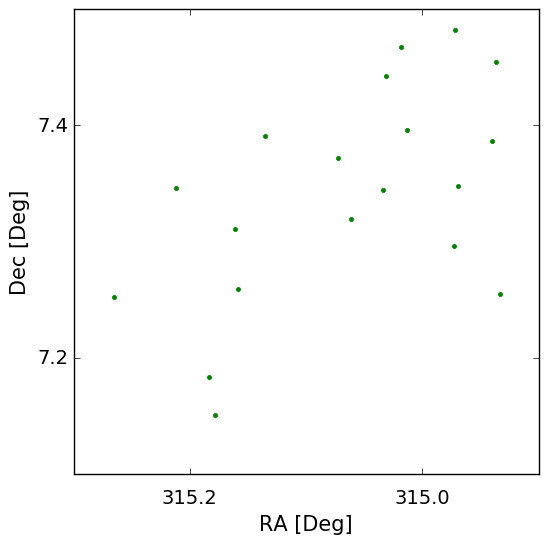

In [88]:
def usno(radeg,decdeg,fovam,epoch):
	import string as str
	import urllib.request as url

	str1 = 'http://webviz.u-strasbg.fr/viz-bin/asu-tsv/?-source=USNO-B1'
	str2 = '&-c.ra={:4.6f}&-c.dec={:4.6f}&-c.bm={:4.7f}/{:4.7f}&-out.max=unlimited'.format(radeg,decdeg,fovam,fovam)

	str = str1 + str2
	print('Calling Vizier', str)
	f= url.urlopen(str)

	# read from the obkect, sotring the page's contents in 's'.
	s = f.read()
	f.close()

	sl = s.splitlines()
	sl = sl[45:-1] # get rid of header 
	name = np.array([])
	rad = np.array([]) #RA in degrees
	ded = np.array([]) # DEC in degrees
	rmag = np.array([]) # rmage

	for k in sl:
		kw =k.split(b'\t')
		ded0 = float(kw[2])
		pmrad = float(kw[6])/3600e3/np.cos(np.deg2rad(ded0)) #convert from mas/yr to deg/year
		pmded = float(kw[7])/3600e3

		name = np.append(name,kw[0])
		rad = np.append(rad, float(kw[1]) + pmrad*(epoch-2000.0))
		ded = np.append(ded,float(kw[2]) + pmded*(epoch-2000.0))

		if kw[12] !=b'     ':
			#print('This is RMag,', kw[12])
			rmag = np.append(rmag,float(kw[12]))
		else:
			rmag = np.append(rmag,np.nan)
	return name,rad,ded,rmag




#######################################################################################################################


##ras = '20:59:54.03'
##des = '+07:16:50.6'

#10-18
ras = '21:00:25.00'
des = '+07:19:35.0'

#10-11
#ras = '20:50:23.00'
#des = '+09:00:12.0'

#10-26
#ras = ''

radeg = 15*(float(ras[0:2]) + float(ras[3:5])/60. + float(ras[6:])/3600.)
dsgn = np.sign(float(des[0:3]))
dedeg = float(des[0:3]) + dsgn*float(des[4:6])/60. + dsgn*float(des[7:])/3600.

fovam = 22.0
name, rad, ded, rmag = usno(radeg, dedeg, fovam, 2017)

#for i in np.arange(len(rmag)):
	#print('rmag= ',rmag[i])
	#print(rmag[i] < 12)

w = np.where(rmag < 12.5)[0]
#w = np.array([])
#for i in np.arange(len(rmag)):
	#elements = rmag[i]
	#w = np.append(w, elements < 12)


	#w = rmag[rmag < 12]	


plt.plot(rad[w],ded[w],'g.')
plt.locator_params(axis='x',nbins=4)
plt.locator_params(axis='y',nbins=4)
plt.tick_params('x',pad=10)
plt.xlabel('RA [Deg]')
plt.ylabel('Dec [Deg]')
plt.ticklabel_format(useOffset=False)
plt.axis('scaled')
ax = plt.gca()
ax.set_xlim(ax.get_xlim()[::-1])
plt.show()

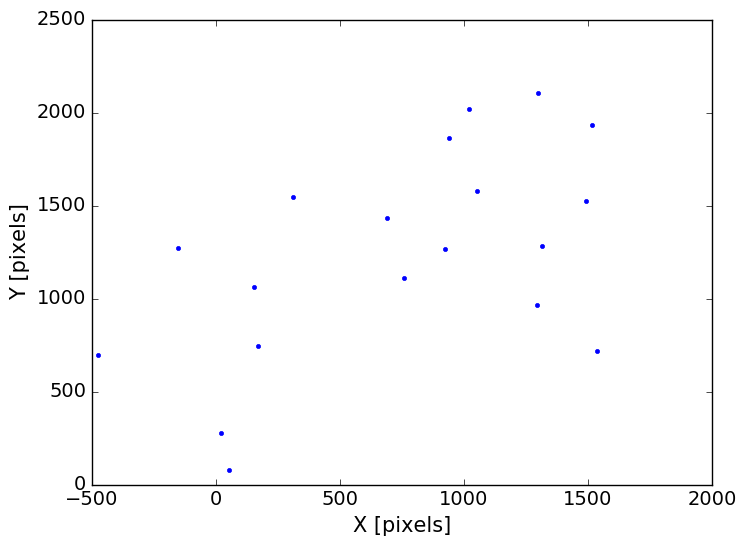

In [89]:
f = 6300# focal length in mm
p = 0.018 # pixel in mm
alpha = rad[w]*(np.pi/180) #degree to rad conversions
delta = ded[w]*(np.pi/180)
alpha_0= 315.104*(np.pi/180)
delta_0= 7.326*(np.pi/180)

X = -(np.cos(delta)*np.sin(alpha - alpha_0))/(np.cos(delta_0)*np.cos(delta)*np.cos(alpha - alpha_0) + np.sin(delta)*np.sin(delta_0))
Y = -(np.sin(delta_0)*np.cos(delta)*np.cos(alpha - alpha_0) - np.cos(delta_0)*np.sin(delta))/(np.cos(delta_0)*np.cos(delta)*np.cos(alpha - alpha_0) + np.sin(delta)*np.sin(delta_0))

y_0 = 1150
x_0 = 500	
#print('X = ', X)
#print('Y = ', Y)

converted_x = f*(X/p) + x_0
converted_y = f*(Y/p) + y_0

plt.plot(converted_x, converted_y, 'b.')
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()


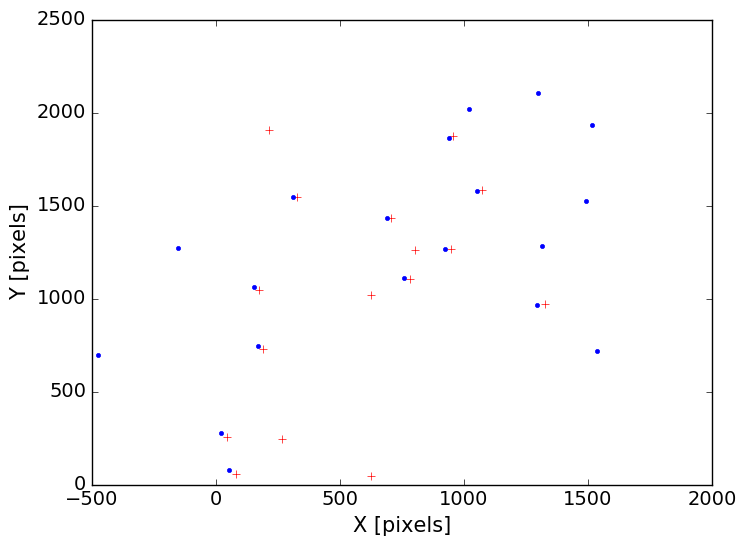

In [92]:
plt.plot(y_centroids, x_centroids, 'r+')
#invert y-axis
plt.plot(converted_x, converted_y, 'b.')
plt.xlabel('X [pixels]')
plt.ylabel('Y [pixels]')
plt.show()

In [93]:

def mymatch(x1,y1,x2,y2,dthres):

    # James R. Graham 11/7/2011 University of Toronto
    #
    # Match up two lists of stars
    #
    # (x1, y1) are the positions of stars in list 1
    # (x2, y2) are the positions of stars in list 2
    #
    # dthres is the star matching threshold distance in pixels
    #
    # id1 and id2 are the indices that match up lists 1 and 2
    # so that x1[id1] should match with x2[id2] etc.
    #

    import numpy as np

    dthres2=dthres**2 # distance squared

    # Step through each index of list 1, look for closest match in 2.

    nstar = np.size(x1)
    print (nstar)

    id1 = np.array([],dtype=int)
    id2 = np.array([],dtype=int)

    for i in np.arange(nstar):
        d2=(x1[i]-x2)**2+(y1[i]-y2)**2 # compute the distance squared

        m      = np.argmin(d2)
        dmatch = d2[m]

        if dmatch <= dthres2:
            # print np.sqrt(dmatch),i,m
            id1 = np.append(id1,i)
            id2 = np.append(id2,m)

    return id1,id2

In [95]:
a_xx = []
a_yy = []

a_xx.append(x_centroids[0])
a_xx.append(x_centroids[6])
a_xx.append(x_centroids[9])
a_xx.append(x_centroids[7])
a_xx.append(x_centroids[12])
a_xx.append(x_centroids[8])
a_xx.append(x_centroids[10])
a_xx.append(x_centroids[1])
a_xx.append(x_centroids[4])
a_xx.append(x_centroids[5])
a_xx.append(x_centroids[2])

a_yy.append(y_centroids[0])
a_yy.append(y_centroids[6])
a_yy.append(y_centroids[9])
a_yy.append(y_centroids[7])
a_yy.append(y_centroids[12])
a_yy.append(y_centroids[8])
a_yy.append(y_centroids[10])
a_yy.append(y_centroids[1])
a_yy.append(y_centroids[4])
a_yy.append(y_centroids[5])
a_yy.append(y_centroids[2])

a_x = np.array(a_xx)
a_y = np.array(a_yy)

aXX = []
aXX.append(X[18])
aXX.append(X[17])
aXX.append(X[7])
aXX.append(X[11])
aXX.append(X[6])
aXX.append(X[5])
aXX.append(X[4])
aXX.append(X[3])
aXX.append(X[16])
aXX.append(X[2])
aXX.append(X[10])

aYY = []
aYY.append(Y[18])
aYY.append(Y[17])
aYY.append(Y[7])
aYY.append(Y[11])
aYY.append(Y[6])
aYY.append(Y[5])
aYY.append(Y[4])
aYY.append(Y[3])
aYY.append(Y[16])
aYY.append(Y[2])
aYY.append(Y[10])

aX = np.array(aXX)
aY = np.array(aYY)

b1 = f*(np.array(aX)/p)
b2 = f*(np.array(aY)/p)
b3 = np.ones(len(b1))

B = np.column_stack((b1, b2, b3))

tb = np.transpose(B)
btb = np.dot(tb, B)
invbtb = np.linalg.inv(btb)
invbtbtb = np.dot(invbtb, tb)

cx = np.dot(invbtbtb, a_x)
cy = np.dot(invbtbtb, a_y)

#print(cy)
#print(cx)

t1 = []
t1.append((f/p)*cy[0])
t1.append((f/p)*cx[0])
t1.append(0)

t2 = []
t2.append((f/p)*cy[1])
t2.append((f/p)*cx[1])
t2.append(0)

t3 = []
t3.append(cy[2])
t3.append(cx[2])
t3.append(1)

T = np.column_stack((t1, t2, t3))
print(T)

Tdet = np.linalg.det(T)
sqrtdet = np.sqrt(Tdet)
print(sqrtdet)
print(sqrtdet/350000)


[[  3.54422474e+05  -4.51330937e+03   5.20401248e+02]
 [  4.53886766e+03   3.54119382e+05   1.14487660e+03]
 [  0.00000000e+00   0.00000000e+00   1.00000000e+00]]
354299.806167
1.01228516048


In [85]:
print(cy)
print(cx)


[  1.01263564e+00  -1.28951696e-02   5.20401248e+02]
[  1.29681933e-02   1.01176966e+00   1.14487660e+03]


In [88]:
invT = np.linalg.inv(T)
xmatrix = []
xmatrix.append(converted_x)
xmatrix.append(converted_y)
xmatrix.append(1)
print(xmatrix)


[array([ 1493.03535135,  1316.47261839,  1051.05546349,   923.92406425,
         759.44745879,   690.02013722,   311.92173412,   154.13234931,
        -151.43066904,  1534.9486648 ,  1294.60489431,   167.45938253,
        -476.48759381,  1516.67005763,  1298.53653177,  1019.45302031,
         938.70164653,    50.91585649,    20.12738625]), array([ 1521.67911024,  1284.33940776,  1578.5499831 ,  1264.12507478,
        1109.18619124,  1432.89231879,  1547.0935649 ,  1059.34916004,
        1270.72404134,   715.58227905,   966.37263227,   743.55428381,
         698.40838157,  1933.62849562,  2102.17717592,  2016.2218735 ,
        1862.00033345,    80.4871971 ,   279.46507237]), 1]


x rms =  0.527550906643
y rms =  0.491128512419


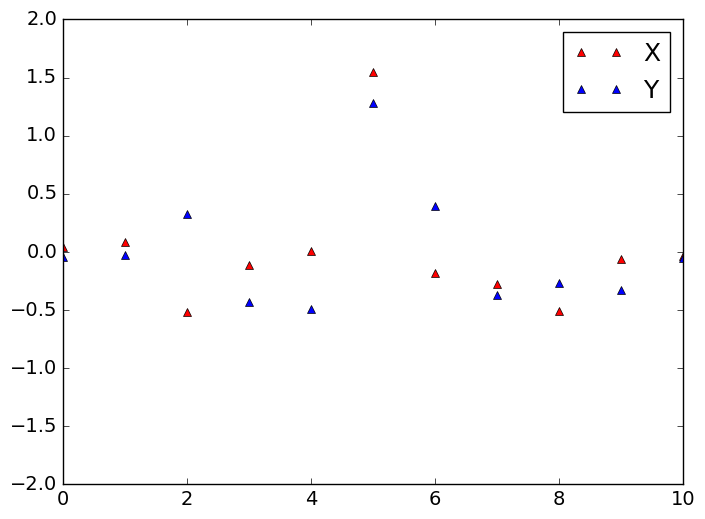

x rms - outliers =  0.212078209815
y rms - outliers =  0.304793205471


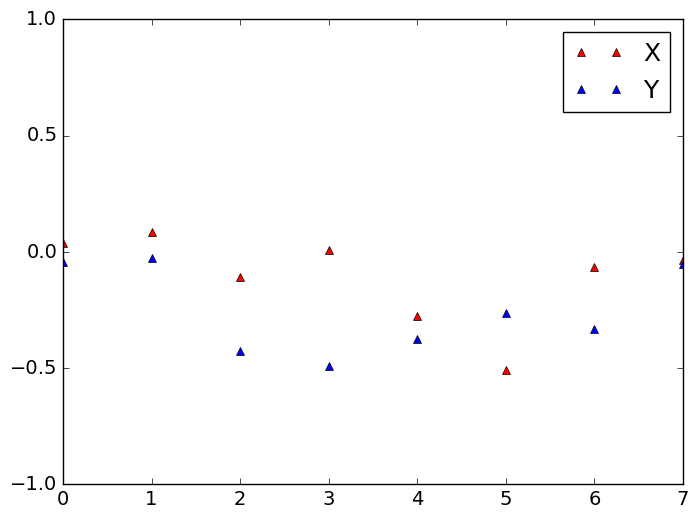

In [97]:

x_pix_usno, y_pix_usno, dum = np.dot(T, np.array([aX, aY,1]))
x_rms = np.sqrt( np.sum( (x_pix_usno - a_y)**2 ) / len(x_pix_usno))
y_rms = np.sqrt( np.sum( (y_pix_usno - a_x)**2 ) / len(y_pix_usno))
print('x rms = ', x_rms)
print('y rms = ', y_rms)

fx = x_pix_usno - a_y
fy = y_pix_usno - a_x
index = [2,5,6]

plt.plot(fx, 'r^', label = 'X')
plt.plot(fy, 'b^', label = 'Y')
plt.ylim(-2.0, 2.0)
plt.legend()
plt.show()

nx_pix = np.delete(x_pix_usno, index)
ny_pix = np.delete(y_pix_usno, index)

nalx = np.delete(a_y, index)
naly = np.delete(a_x, index)

x_rms = np.sqrt( np.sum( (nx_pix - nalx)**2 ) / len(nx_pix))
y_rms = np.sqrt( np.sum( (ny_pix - naly)**2 ) / len(ny_pix))
print('x rms - outliers = ', x_rms)
print('y rms - outliers = ', y_rms)


nfx = np.delete(fx, index)
nfy = np.delete(fy, index)

plt.plot(nfx, 'r^', label = 'X')
plt.plot(nfy, 'b^', label = 'Y')
plt.ylim(-1.0, 1.0)
plt.legend()
plt.show()

In [157]:
#10-13-05:00 #20:58:48 09:12:05
#RA:
ra1 =314.7000 *(np.pi/180)
#DEC
dec1 = 9.2014 *(np.pi/180)

#10-20-05:00 #21:08:17 07:27:49
#RA:
ra2 = 317.0708 *(np.pi/180)
#DEC: 
dec2 =7.4636*(np.pi/180)

#10-28-05:00 #21:20:16 05:45:56
#RA: 
ra3 = 320.0667*(np.pi/180)
#DEC: 
dec3 = 5.7656*(np.pi/180)
##############################################################################################################




#10-11
#ra1 = 314.383*(np.pi/180)
#dec1 = 9.469*(np.pi/180)
sx1 = np.cos(ra1)*np.cos(dec1)
sy1 = np.sin(ra1)*np.cos(dec1)
sz1 = np.sin(dec1)
sv1 = np.array([sx1, sy1, sz1])

#Ra and dec of 10-18 in degree converts to radient
#ra2 = 315.104*(np.pi/180)
#dec2 = 7.326*(np.pi/180)
sx2 = np.cos(ra2)*np.cos(dec2)
sy2 = np.sin(ra2)*np.cos(dec2)
sz2 = np.sin(dec2)
sv2 = np.array([sx2, sy2, sz2])

#10-26
#ra3 = 319.679*(np.pi/180)
#dec3 = 5.96*(np.pi/180)
sx3 = np.cos(ra3)*np.cos(dec3)
sy3 = np.sin(ra3)*np.cos(dec3)
sz3 = np.sin(dec3)
sv3 = np.array([sx3, sy3, sz3])
print(sv1)
print(sv2)
print(sv3)

[ 0.69434367 -0.70165316  0.15990531]
[ 0.72599242 -0.6753236   0.1298963 ]
[ 0.76291317 -0.63864818  0.10045896]


In [177]:
k = 0.017202098950 #in AU^(3/2) d^-1
t1 = (5./24) + (0/(24*60)) + (0/(24*60*60))
t2 =  7 + (5./24) + (0/(24*60)) + (0/(24*60*60))
t22 = (4./24.) + (14./(24*60)) + (21.47/(24*60*60))
t3 = 8 + (5./24.) + (0/(24*60)) + (0/(24*60*60))

#t1 = (4./24) + (14./(24*60)) + (25.52/(24*60*60)) #initial time converted to days (10-11)
#t2 = 7 + (4./24) + (14./(24*60)) + (21.47/(24*60*60)) #end time in days  (1-18)

tau1 = t2 - t1 # time difference between 10-18 and 10-11 in days

#t22 = (4./24.) + (14./(24*60)) + (21.47/(24*60*60))
#t3 = 8 + (3./24.) + (58./(24*60)) + (03.10/(24*60*60))

tau3 = t3 - t22 # time difference between 10-26 and 10-18 in days

R = 1 #AU
vR1 = np.array([9.421849604402555e-1, 3.124431852368845e-1,  1.352997685275017e-1]) #Heliocentric Unit vector at three epochs
vR2 = np.array([8.930309961463524e-1,  4.137003536307501e-1,  1.791921215598752e-1])
vR3 = np.array([8.208415082902728e-1,  5.219654892752267e-1,  2.261288217762586e-1])
r = 3 #guess in AU
s1 = sv1 #unit vector s of three epochs
s2 = sv2
s3 = sv3

#############################################################################################################################

ds = (tau3*(s2 - s1)/(tau1*(tau1 + tau3))) + (tau1*(s3-s2)/(tau3*(tau1+tau3))) #first derivative s
dssq = ds**2
lends = np.sqrt(np.sum(dssq))
dshat = ds/lends
print('ds = ', ds)

dss = (2.*(s3-s2)/(tau3*(tau1+tau3)))-(2.*(s2-s1)/(tau1*(tau1+tau3))) #second derivative of s
dsssq = dss**2
lendss = np.sqrt(np.sum(dsssq))
dsshat = dss/lendss
print('dss = ', dss)
############################################################################################################################
dsscs1 = np.cross(dss, s1)
Rcs1 = np.cross(vR1, s1)
ro1 = (k**2)*((1./R**3) - (1./r**3)) * (np.dot(ds, Rcs1))/(np.dot(ds, dsscs1))

dsscs2 = np.cross(dss, s2)
Rcs2 = np.cross(vR2, s2)
ro2 = (k**2)*((1./R**3) - (1./r**3)) * (np.dot(ds, Rcs2))/(np.dot(ds, dsscs2))

dsscs3 = np.cross(dss, s3)
Rcs3 = np.cross(vR3, s3)
ro3 = (k**2)*((1./R**3) - (1./r**3)) * (np.dot(ds, Rcs3))/(np.dot(ds, dsscs3))
############################################################################################################################
print('tau 1 = ', tau1)
print('tau 3 = ',tau3)
print('rho1 = ', ro1)
print('rho2 = ', ro2)
print('rho3 = ', ro3)

ds =  [ 0.00455647  0.00413623 -0.00399741]
dss =  [  1.00630199e-05   1.07103002e-04   8.27391041e-05]
tau 1 =  7.0
tau 3 =  8.031695949074075
rho1 =  1.24737800425
rho2 =  1.41550419306
rho3 =  1.57110743608


In [175]:
def give_me_a_new_r(r):
    rho = (k**2)*((1./R**3) - (1./r**3)) * (np.dot(ds, Rcs1))/(np.dot(ds, dsscs1))
    new_r = np.sqrt(rho**2 + R**2 + 2*rho*np.dot(vR1, s1))
    print('rho =', rho)
    return new_r
def repeat_times(r, times):
    for i in np.arange(times):
        r = give_me_a_new_r(r)
        print('r =', r)
    return r
print(repeat_times(3, 20))        

rho = 1.24737800425
r = 1.92225878923
rho = 1.11298427713
r = 1.80419796974
rho = 1.07478942149
r = 1.7710698509
rho = 1.06217938086
r = 1.76017767517
rho = 1.05782380578
r = 1.75642080075
rho = 1.05629635603
r = 1.75510396379
rho = 1.05575786434
r = 1.75463980356
rho = 1.05556767068
r = 1.7544758737
rho = 1.0555004509
r = 1.75441793756
rho = 1.05547668806
r = 1.75439745672
rho = 1.05546828697
r = 1.75439021598
rho = 1.05546531678
r = 1.75438765602
rho = 1.05546426666
r = 1.75438675095
rho = 1.05546389539
r = 1.75438643095
rho = 1.05546376413
r = 1.75438631782
rho = 1.05546371772
r = 1.75438627782
rho = 1.05546370131
r = 1.75438626368
rho = 1.05546369551
r = 1.75438625868
rho = 1.05546369346
r = 1.75438625691
rho = 1.05546369273
r = 1.75438625628
1.75438625628


In [176]:
#s1 r = 1.74578696336 AU
rho1 = 1.04547781661
#s2 r = 1.87222760845 AU
rho2 = 1.23843988525
#s3 r = 1.96858388663 AU
rho3 = 1.40920130329
 
rv1 = vR1 + rho1*s1
rv2 = vR2 + rho2*s2
rv3 = vR3 + rho3*s3

print('rv1 = ', rv1)
print('rv2 = ', rv2)
print('rv3 = ', rv3)

rv1 =  [ 1.66810587 -0.42111963  0.30247722]
rv2 =  [ 1.79212896 -0.42264733  0.34006088]
rv3 =  [ 1.89593974 -0.37801835  0.36769572]


In [182]:
x_error = x_rms * 0.582
y_error = y_rms * 0.582

print('x_error = ', x_error)
print('y_error = ', y_error)

y_0 = 1150
x_0 = 500	
#print('X = ', X)
#print('Y = ', Y)

Xx = (f/p)*(x_error - x_0)
Yy = (f/p)*(y_error - y_0)

Xx = -(np.cos(delta)*np.sin(alpha - alpha_0))/(np.cos(delta_0)*np.cos(delta)*np.cos(alpha - alpha_0) + np.sin(delta)*np.sin(delta_0))
Yy = -(np.sin(delta_0)*np.cos(delta)*np.cos(alpha - alpha_0) - np.cos(delta_0)*np.sin(delta))/(np.cos(delta_0)*np.cos(delta)*np.cos(alpha - alpha_0) + np.sin(delta)*np.sin(delta_0))


x_error =  0.123429518112
y_error =  0.177389645584
